# KMeans Cluster

In [17]:
#Dataset imoprt 
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb

In [86]:
mail_customers = pd.read_csv('mall customers.csv') # load dataset

In [90]:
mail_customers.head() # show head 5 rows 

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [88]:
mail_customers.drop('CustomerID',axis=1,inplace=True) # drop 1 columns

In [89]:
# rename all columns 
mail_customers.rename(columns={'Gender':'gender','Age':'age','Annual Income (k$)':'income',
                                'Spending Score (1-100)':'score'},inplace=True)

In [91]:
mail_customers.corr() # show dataset corr value 

,age,income,score
age,1.000000,-0.012398,-0.327227
income,-0.012398,1.000000,0.009903
score,-0.327227,0.009903,1.000000


<AxesSubplot:>

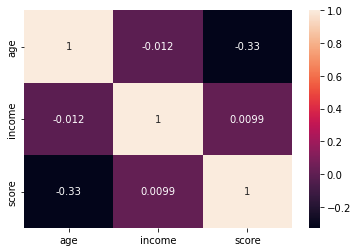

In [92]:
sb.heatmap(mail_customers.corr(),annot=True) # show heatmap dataset corr

# Visualization

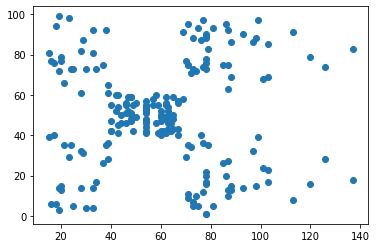

In [93]:
mp.scatter(mail_customers['income'],mail_customers['score']) # show scatter plot

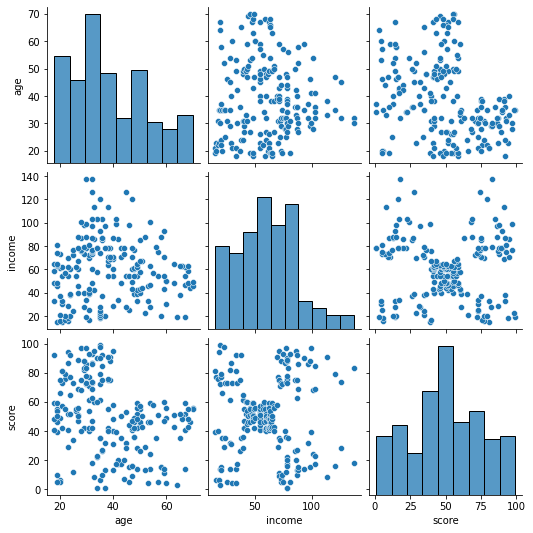

In [94]:
sb.pairplot(mail_customers[['age','income','score']]) # show dataset pairplot

In [27]:
#imoprt ml algorithm
import sklearn.cluster as cluster

In [96]:
kmeans=cluster.KMeans() # crate object

AttributeError: 'numpy.ndarray' object has no attribute 'KMeans'

In [97]:
mail_customers['cluster']=kmeans.fit_predict(mail_customers[['income','score']]) # fit cluster

In [85]:
kmeans.cluster_centers_ 

array([[ 78.55172414,  82.17241379],
       [ 63.95238095,  46.21428571],
       [ 25.0952381 ,  80.04761905],
       [ 80.18181818,  12.68181818],
       [ 25.14285714,  19.52380952],
       [109.7       ,  22.        ],
       [109.7       ,  82.        ],
       [ 47.44444444,  51.24444444]])

In [38]:
mail_customers.head()

,gender,age,income,score,cluster
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


In [44]:
mail_customers0=mail_customers[mail_customers.cluster==0]
mail_customers1=mail_customers[mail_customers.cluster==1]
mail_customers2=mail_customers[mail_customers.cluster==2]
mail_customers3=mail_customers[mail_customers.cluster==3]
mail_customers4=mail_customers[mail_customers.cluster==4]
mail_customers5=mail_customers[mail_customers.cluster==5]
mail_customers6=mail_customers[mail_customers.cluster==6]
mail_customers7=mail_customers[mail_customers.cluster==7]

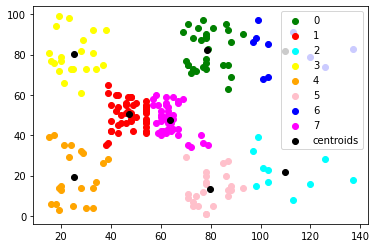

In [48]:
cluster=kmeans.cluster_centers_
mp.scatter(mail_customers0['income'], mail_customers0['score'], color='green', label='0')
mp.scatter(mail_customers1['income'], mail_customers1['score'], color='red', label='1')
mp.scatter(mail_customers2['income'], mail_customers2['score'], color='cyan', label='2')
mp.scatter(mail_customers3['income'], mail_customers3['score'], color='yellow', label='3')
mp.scatter(mail_customers4['income'], mail_customers4['score'], color='orange', label='4')
mp.scatter(mail_customers5['income'], mail_customers5['score'], color='pink', label='5')
mp.scatter(mail_customers6['income'], mail_customers6['score'], color='blue', label='6')
mp.scatter(mail_customers7['income'], mail_customers7['score'], color='magenta', label='7')
mp.scatter(cluster[:,0],cluster[:,1],color='black',label='centroids')
mp.legend()

# Select Optimal Number Of Clusters

In [77]:
import warnings as wr
wr.filterwarnings('ignore')

from sklearn.cluster import KMeans

wcss=[]

a = range(1,15)

for i in a:
    b=KMeans(n_clusters=i)
    b.fit(mail_customers[['income','score']])
    wcss.append(b.inertia_)



In [78]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30273.394312070028,
 25030.383098520324,
 21826.936303231643,
 19712.851860217084,
 17884.720965946224,
 15838.717785514093,
 14265.263882522702,
 12747.464279348102]

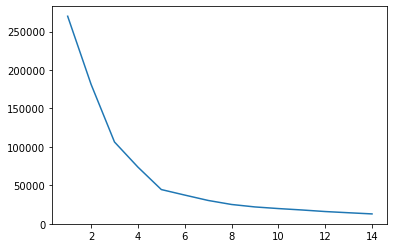

In [79]:
mp.plot(a,wcss)

In [61]:
!pip install kneed

In [80]:
from kneed import KneeLocator 

In [82]:
kl=KneeLocator(a,wcss,curve='convex',direction='decreasing')

In [83]:
kl.knee

5